In [25]:
import pandas as pd

import re
!pip install emoji
import emoji  # Install via pip install emoji


import nltk
from nltk.tokenize import word_tokenize  # Add this impor

nltk.download('punkt')          # General tokenizer data

!pip install pyarabic
from pyarabic.araby import tokenize  # Import Arabic tokenizer

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.isri import ISRIStemmer  # Stemmer for Arabic'



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Collection step :

In [3]:
# Load the Excel file dataset into a dataframe
df = pd.read_excel('combined_dataset.xlsx')

In [4]:
# Keep only the 'label' and 'text' columns from the DataFrame
df = df[['label', 'text']]
df

,label,text
0,1,والله شايفيتلك الناس كلها صاير عندها اكتئاب لا...
1,1,اكيد اكتئاب بعد العصر ما في زيه بس ان شاء الله...
2,1,والله ما أنا عارف هو اكتئاب ولا انطفاء ولا نضج...
3,1,اصبروا داخله في حاله اكتئاب 💔😭
4,1,هذا اكتئاب ولا
...,...,...
11853,1,قلنا ان اهلي مايحبوني مو لدرجه اصحي وماحصل احد...
11854,0,يوم جميل جدا
11855,0,الهم ابي سندي الهم امي نبضي الهم اخواني ...
11856,1,اكره الدوام واكره الجامعه واكره الصباح


In [5]:
# Remove rows with empty values
df.dropna(inplace=True)
# Remove duplicate rows
df = df.drop_duplicates()

In [6]:
# Check if the dataset is balanced by showing class distribution percentages
print("Class Distribution:\n", df['label'].value_counts(normalize=True))

Class Distribution:
 label
1    0.500211
0    0.499789
Name: proportion, dtype: float64


In [7]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11843 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11843 non-null  int64 
 1   text    11843 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.6+ KB
None


In [8]:

# Get NLTK Arabic stopwords and normalize them

"""
#Stopwords Removal Problem
#My text was normalized, but NLTK stopwords were not. So,
#they didn’t match, and stopwords weren’t removed. I fixed it by normalizing the
#stopwords too and saving them in a set called normalized_stopwords."""



arabic_stopwords = set(stopwords.words('arabic'))

normalized_stopwords = set()

for word in arabic_stopwords:
    # Apply the same normalization as your text
    word = re.sub("[إأآا]", "ا", word)  # Normalize Alef
    word = re.sub("ى", "ي", word)       # Normalize Ya
    word = re.sub("[ؤئ]", "ء", word)    # Normalize Hamza
    normalized_stopwords.add(word)



def data_cleaner(text):

    # Step 1: Remove URLs, hashtags, mentions
    text = re.sub(r'http\S+', '', text)        # Remove URLs
    text = re.sub(r'[@#]\w+', '', text)        # Remove mentions (@) and hashtags (#)

    # Step 2: Normalize Arabic text (remove diacritics)
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)  # Remove Arabic diacritics

    # Step 3: Normalize Hamza and Alef variations
    text = re.sub("[إأآا]", "ا", text)         # Normalize Alef variations
    text = re.sub("ى", "ي", text)              # Normalize Ya
    text = re.sub("ؤ", "ء", text)              # Normalize Hamza
    text = re.sub("ئ", "ء", text)              # Normalize Hamza

    # Step 4: Remove emojis (using emoji library + regex)
    text = emoji.replace_emoji(text, replace='')  # Remove emojis using the emoji library

    # Step 5: Remove punctuation and special characters
    arabic_punct = r'[،؛؟.!\"\'\(\)\[\]\{\}:;,\.\?]'  # Define Arabic punctuation
    text = re.sub(arabic_punct, ' ', text)     # Replace with space

    # Step 6: Remove numbers
    text = re.sub(r'\d+', '', text)            # Remove digits

    # Step 7: Remove English letters (A-Za-z)
    text = re.sub(r'[A-Za-z]', '', text)       # Remove English characters

    # Step 8: Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()   # Collapse multiple spaces

    # Step 9: Tokenize the cleaned text
    tokens = tokenize(text)  # Arabic-specific tokenization

    # Debugging: Print tokens to verify
    #print(f"Original: {text}")
    #print(f"Tokens: {tokens}")

    # Step 10: Remove stopwrods
    tokens = [word for word in tokens if word not in normalized_stopwords]

    #Step 11: Stem tokens

    # Initialize stemmer
    stemmer = ISRIStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Step 12: Remove any remaining garbage characters
    tokens = [word for word in tokens if re.match(r'^[\u0620-\u064A]+$', word)]

    # Join tokens and return the cleaned text
    cleaned_text = " ".join(tokens)

    return cleaned_text

In [9]:
# Apply data_cleaner function on the dataset text
df['text'] = df['text'].apply(lambda x: data_cleaner(x))
print(df.head())

   label                                               text
0      1   ولل شايفيتلك ناس كله صير عند كءب لزم فكو حظر بكف
1      1  اكد كءب عصر زيه شاء الل عيد دا اشف عمل تطع خير...
2      1                        ولل عرف كءب طفء نضج وحد وحد
3      1                                    صبر دخل حله كءب
4      1                                                كءب


<ipython-input-9-d53f6699c614>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: data_cleaner(x))


In [10]:
print(df.info())  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 11843 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11843 non-null  int64 
 1   text    11843 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.6+ KB
None


In [11]:
df = df[df['text'].str.strip().astype(bool)]  # Remove empty texts

In [12]:
print(df.info())  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 11838 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11838 non-null  int64 
 1   text    11838 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.5+ KB
None


# Feature Extraction & Feature Selection

In [13]:
# Vectorivation

from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer with custom settings

#Feature Selection:

tfidf = TfidfVectorizer(
    #max_features=5000,
    #ngram_range=(1, 2),
    # convert the normalized_stopwrods set to a list to make it work correctly with vectorization step
    #stop_words= list(normalized_stopwords),
    max_features=10000,        # Use the top 10,000 most important words
    ngram_range=(1, 3),        # Include unigrams, bigrams, and trigrams
    min_df=3,                  # Ignore words that appear in fewer than 3 documents
    max_df=0.9                 # Ignore words that appear in more than 90% of the documents

)

#Feature Extraction:

# Apply the vectorizer to the 'text' column to convert it into numeric features
X = tfidf.fit_transform(df['text'])
# Set the target labels (depressed = 1, non-depressed = 0)
y = df['label']

In [14]:
print(tfidf.get_feature_names_out()[:20])  # peek at vocabulary


['ءثر' 'ءجر' 'ءخر' 'ءذي' 'ءسف' 'ءشر' 'ءقت' 'ءكد' 'ءلم' 'ءلم تنم'
 'ءلم تنم ليل' 'ءلم جمل' 'ءلم جمل ذكر' 'ءمر' 'ءمن' 'ءمن افق' 'ءمن افق غيب'
 'اءم' 'ااه' 'ابا']


# Feature Classification

In [15]:
 # Split into training (80%) and testing (20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,  # TF-IDF vectors (features)
    y,  # Labels (0 = non-depressed, 1 = depressed)
    test_size=0.2,  # 20% for testing
    random_state=42,  # ensures the split is the same every time (for reproducibility)
    stratify=y # Ensures balanced class distribution in both sets
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")





Training samples: 9470
Testing samples: 2368


# LSTM (Long Short-Term Memory)

Vocabulary size: 6633


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.7153 - loss: 0.5410 - precision: 0.7429 - recall: 0.6264

119/119 ━━━━━━━━━━━━━━━━━━━━ 60s 426ms/step - accuracy: 0.7161 - loss: 0.5403 - precision: 0.7436 - recall: 0.6279 - val_accuracy: 0.8297 - val_loss: 0.5187 - val_precision: 0.7609 - val_recall: 0.9766
Epoch 2/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.9293 - loss: 0.2451 - precision: 0.9252 - recall: 0.9341

119/119 ━━━━━━━━━━━━━━━━━━━━ 76s 380ms/step - accuracy: 0.9294 - loss: 0.2447 - precision: 0.9255 - recall: 0.9340 - val_accuracy: 0.9232 - val_loss: 0.2064 - val_precision: 0.9446 - val_recall: 0.9042
Epoch 3/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.9619 - loss: 0.1119 - precision: 0.9752 - recall: 0.9464

119/119 ━━━━━━━━━━━━━━━━━━━━ 84s 398ms/step - accuracy: 0.9619 - loss: 0.1119 - precision: 0.9752 - recall: 0.9465 - val_accuracy: 0.9301 - val_loss: 0.1968 - val_precision: 0.9190 - val_recall: 0.9480
Epoch 4/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 83s 408ms/step - accuracy: 0.9788 - loss: 0.0749 - precision: 0.9779 - recall: 0.9796 - val_accuracy: 0.9274 - val_loss: 0.1990 - val_precision: 0.9279 - val_recall: 0.9317
Epoch 5/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 81s 398ms/step - accuracy: 0.9873 - loss: 0.0526 - precision: 0.9882 - recall: 0.9861 - val_accuracy: 0.9222 - val_loss: 0.2460 - val_precision: 0.9144 - val_recall: 0.9368
Epoch 6/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 83s 404ms/step - accuracy: 0.9918 - loss: 0.0391 - precision: 0.9927 - recall: 0.9908 - val_accuracy: 0.9295 - val_loss: 0.2446 - val_precision: 0.9416 - val_recall: 0.9205


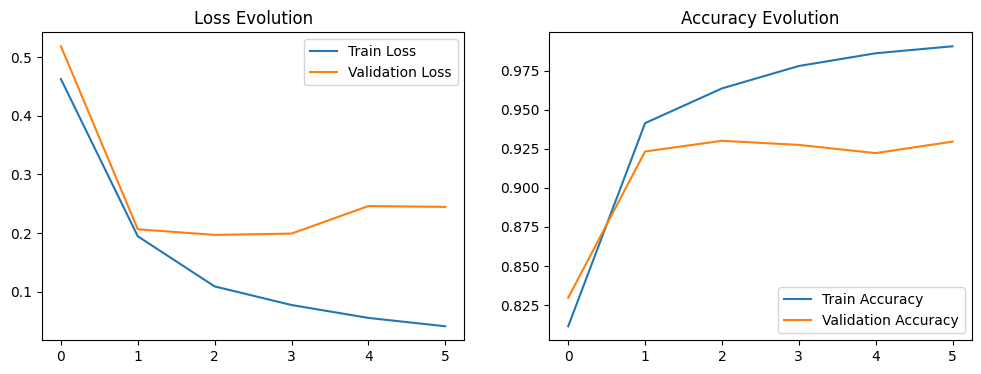

74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make sure X_train contains the raw text data, not a sparse matrix
# If X_train is a sparse matrix, you need to get the original text data

X = df['text']  # Raw text
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # X_train should be a list/array of strings

vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 100  # Adjust based on your text length distribution
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Handle class imbalance
# Need to reshape for RandomOverSampler
X_train_reshaped = X_train_pad.reshape(X_train_pad.shape[0], -1)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_reshaped, y_train)

# Reshape back to original dimensions
X_train_resampled = X_train_resampled.reshape(-1, max_len)

# LSTM Model
embedding_dim = 128  # Dimension of word embeddings
lstm_units = 64      # Number of LSTM units

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(lstm_units, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(lstm_units//2)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.h5', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    X_train_resampled,
    y_train_resampled,
    validation_split=0.2,
    epochs=15,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.show()

# Load best model
lstm_model = tf.keras.models.load_model('best_lstm_model.h5')

# Evaluate on test set
y_pred_probs = lstm_model.predict(X_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int)



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print(lstm_model.summary())



Accuracy: 93.71%
Precision: 0.93
Recall: 0.95
F1 Score: 0.94
ROC-AUC: 0.98


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │       849,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 989,123 (3.77 MB)

 Trainable params: 989,121 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


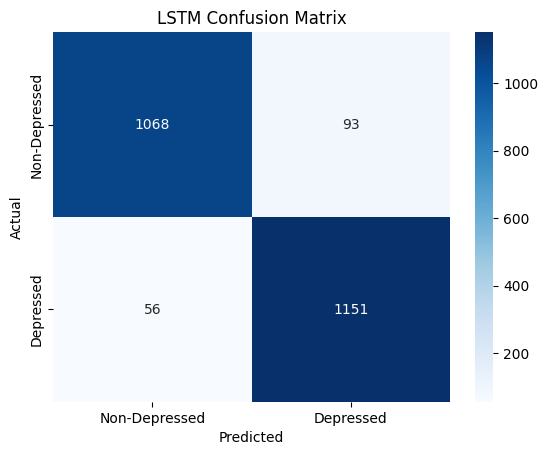

Model and tokenizer saved successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
Prediction: Depressed
Probability: 0.9964


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Depressed', 'Depressed'],
            yticklabels=['Non-Depressed', 'Depressed'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save tokenizer and model
import pickle

# Save tokenizer
with open('lstm_tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save model architecture + weights
model.save('lstm_model.h5')

print("Model and tokenizer saved successfully.")

# Example of loading and using the model
loaded_model = tf.keras.models.load_model('lstm_model.h5')

with open('lstm_tokenizer.pkl', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

def predict_depression(text):
    cleaned_text = data_cleaner(text)
    seq = loaded_tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')
    prob = loaded_model.predict(padded)[0][0]
    prediction = 1 if prob > 0.5 else 0
    return prediction, prob

new_text = "اشعر بالاكتئاب"  # Replace with your text
prediction, probability = predict_depression(new_text)
print(f"Prediction: {'Depressed' if prediction == 1 else 'Non-Depressed'}")
print(f"Probability: {probability:.4f}")